## Conda

Creating and removing virtual environments with conda

In [ ]:
conda create -n env_name python=3.6 pandas numpy
conda env remove -n env_name

Create 

In [ ]:
conda create -n py3 python=3

Activating environment

In [ ]:
source activate my_env

Exporting environment to share it with teammates 

In [ ]:
conda env export > environment.yaml

Create environment from yaml file

In [ ]:
conda env create -f environment.yaml

## Jupyter

Install Notebook Conda to help manage the environments in Jupyter

In [ ]:
conda install nb_conda

Create slides in Jupyter and launch (in Slides mode):

In [ ]:
jupyter nbconvert notebook.ipynb --to slides --post serve

## Pandas

### Reading a file

Read a file and replace column names with custom ones

In [29]:
labels = ['patient', 'diagnosis', 'radius', 'texture', 'perimeter', 'area',
       'smoothness', 'compactness', 'concavity', 'concave_points', 'symmetry']
df = pd.read_csv('cancer_data_edited.csv', header=0, names=labels)
df.head(3)

,patient,diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,symmetry
0,842302,M,17.99,19.293431,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419
1,842517,M,20.57,17.770000,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812
2,84300903,M,19.69,21.250000,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069


### Data frame summaries

Datatypes of all columns. Note: Pandas store **pointers** to strings

In [23]:
df.dtypes

patient             int64
diagnosis          object
radius            float64
texture           float64
perimeter         float64
area              float64
smoothness        float64
compactness       float64
concavity         float64
concave_points    float64
symmetry          float64
dtype: object

Summary statistics

In [24]:
df.describe()

,patient,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,symmetry
count,5.640000e+02,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000
mean,3.060557e+07,14.120335,19.276458,91.927784,654.047163,0.096096,0.104610,0.088832,0.048967,0.181191
std,1.255492e+08,3.514862,4.232968,24.221072,350.428965,0.013328,0.052766,0.079158,0.038613,0.026298
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000
25%,8.690778e+05,11.697500,16.292500,75.135000,420.175000,0.086847,0.065175,0.029540,0.020347,0.163500
50%,9.060010e+05,13.375000,18.905000,86.415000,551.400000,0.096087,0.094575,0.061680,0.033770,0.181091
75%,8.873089e+06,15.797500,21.680000,103.925000,782.700000,0.103900,0.130500,0.131950,0.074067,0.193775
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000


### Selecting columns

Select all the columns from 'id' to the last mean column

In [27]:
df_subset = df.loc[:,'patient':'area']
df_subset.head(3)

,patient,diagnosis,radius,texture,perimeter,area
0,842302,M,17.99,19.293431,122.8,1001.0
1,842517,M,20.57,17.770000,132.9,1326.0
2,84300903,M,19.69,21.250000,130.0,1203.0


OR

In [28]:
df_subset = df.iloc[:,:6]
df_subset.head(3)

,patient,diagnosis,radius,texture,perimeter,area
0,842302,M,17.99,19.293431,122.8,1001.0
1,842517,M,20.57,17.770000,132.9,1326.0
2,84300903,M,19.69,21.250000,130.0,1203.0


View the index number and label for each column

In [30]:
for i, v in enumerate(df.columns):
    print(i, v)

0 patient
1 diagnosis
2 radius
3 texture
4 perimeter
5 area
6 smoothness
7 compactness
8 concavity
9 concave_points
10 symmetry


Convenient way to generate indices to select non-adjacent columns:

In [32]:
import numpy as np
indices = np.r_[:2, 6:9]
df.iloc[:,indices].head(3)

,patient,diagnosis,smoothness,compactness,concavity
0,842302,M,0.11840,0.27760,0.3001
1,842517,M,0.08474,0.07864,0.0869
2,84300903,M,0.10960,0.15990,0.1974


### Imputation

Imputation

In [33]:
df.smoothness.fillna(df.smoothness.mean(), inplace = True)

### Duplicates

Find duplicates  
(True means that this value is a duplicate. E.g. if there are two occurences, the first one will be labelled as False, the second one as True)

In [36]:
df.duplicated().head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

Remove duplicates

In [37]:
df.drop_duplicates(inplace=True)

### Datetime

In [ ]:
df['column_name'] = pd.to_datetime(df['column_name'])

### Plots

Include to use plots in Jupyter notebook

In [38]:
%matplotlib inline

Histograms

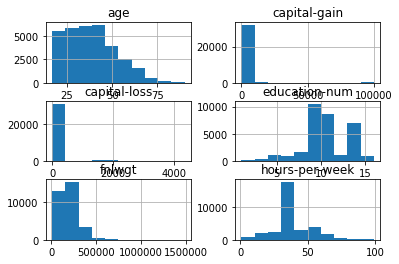

In [49]:
df_census = pd.read_csv('census_income_data.csv')
df_census.hist();

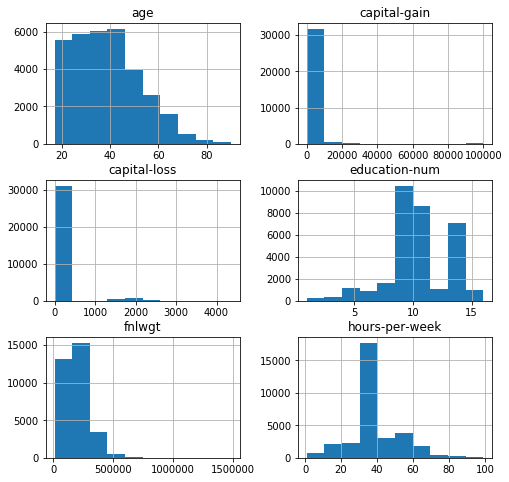

In [50]:
df_census.hist(figsize=(8,8)); # specify figure size and suprsess outputing text 

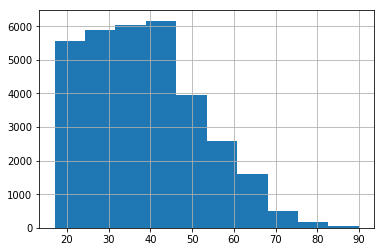

In [54]:
df_census['age'].hist();

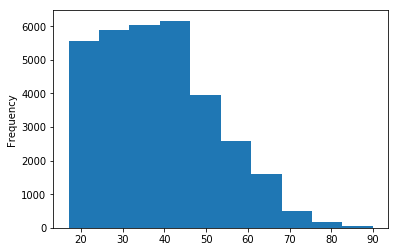

In [55]:
df_census['age'].plot(kind='hist');

Bar charts

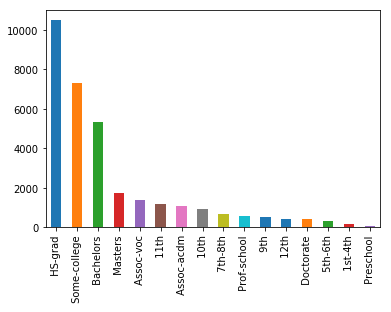

In [58]:
df_census['education'].value_counts().plot(kind='bar');

Pie charts

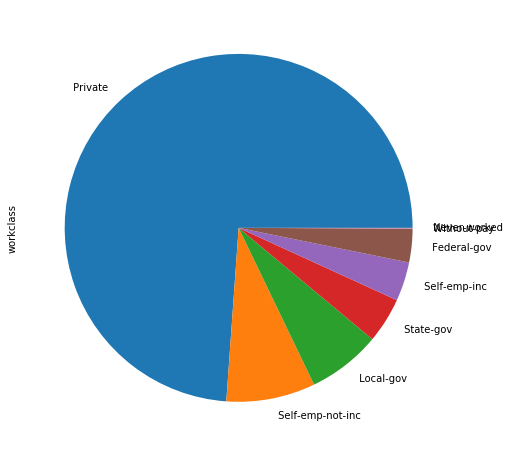

In [59]:
df_census['workclass'].value_counts().plot(kind='pie', figsize=(8, 8));

Relationships for all pairs and histograms for each variable

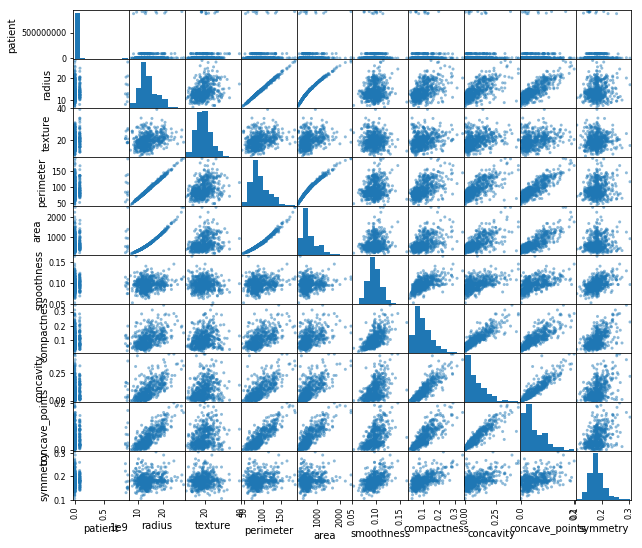

In [62]:
pd.plotting.scatter_matrix(df, figsize=(10,9));

Simple scatter plot for two variables:

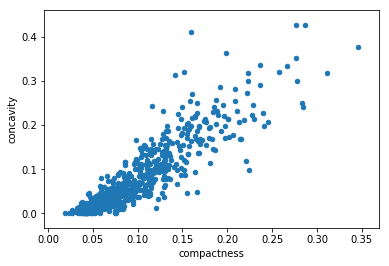

In [64]:
df.plot(x='compactness', y='concavity', kind='scatter');

Box plot

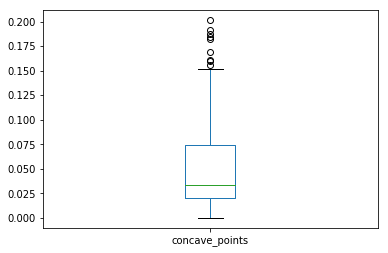

In [66]:
df['concave_points'].plot(kind='box');